# LOAN PREDICTION USING MACHINE LEARNING 

**The major aim of this project is to predict which of the customers will have their loan paid or not. Therefore, this is a supervised classification problem to be trained with algorithms like:**

**1.Logistic Regression**

**2.Decision Tree**

**3.Random Forest**

# DATA CLEANING

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [49]:
df_train.shape

(614, 13)

In [50]:
df_test.shape

(367, 12)

In [51]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# MISSING VALUE CHECK

In [52]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


# FILL MISSING VALUES

In [53]:
df_train['Gender'] = df_train['Gender'].fillna(df_train['Gender'].dropna().mode().values[0] )
df_train['Married'] = df_train['Married'].fillna(df_train['Married'].dropna().mode().values[0] )
df_train['Dependents'] = df_train['Dependents'].fillna(df_train['Dependents'].dropna().mode().values[0] )
df_train['Self_Employed'] = df_train['Self_Employed'].fillna(df_train['Self_Employed'].dropna().mode().values[0] )
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].dropna().median() )
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].dropna().mode().values[0] )
df_train['Credit_History'] = df_train['Credit_History'].fillna(df_train['Credit_History'].dropna().mode().values[0] )

In [54]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Loan_Status,0,0.0
Property_Area,0,0.0
Credit_History,0,0.0
Loan_Amount_Term,0,0.0
LoanAmount,0,0.0
CoapplicantIncome,0,0.0
ApplicantIncome,0,0.0
Self_Employed,0,0.0
Education,0,0.0
Dependents,0,0.0


In [55]:
df_train.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

# EXPLORATORY DATA ANALYSIS

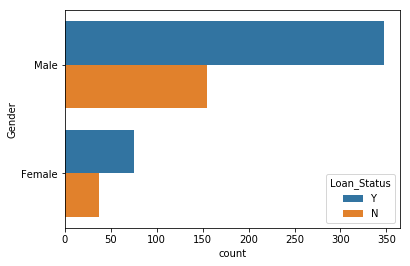

In [56]:
sns.countplot(y = 'Gender', hue = 'Loan_Status', data = df_train)

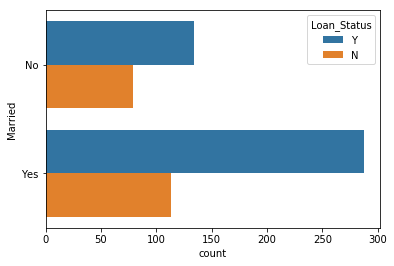

In [57]:
sns.countplot(y = 'Married', hue = 'Loan_Status', data = df_train)

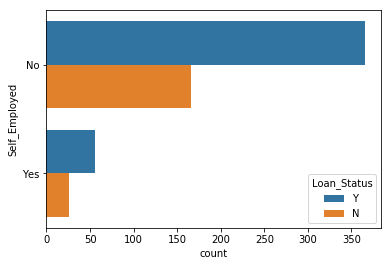

In [58]:
sns.countplot(y = 'Self_Employed', hue = 'Loan_Status', data = df_train)

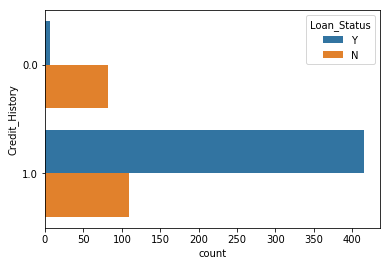

In [59]:
sns.countplot(y = 'Credit_History', hue = 'Loan_Status', data = df_train)

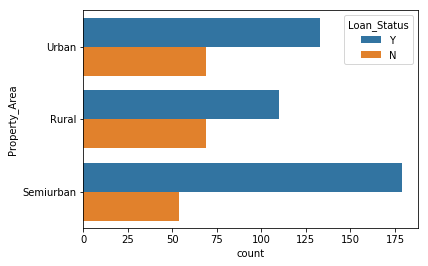

In [60]:
sns.countplot(y = 'Property_Area', hue = 'Loan_Status', data = df_train)

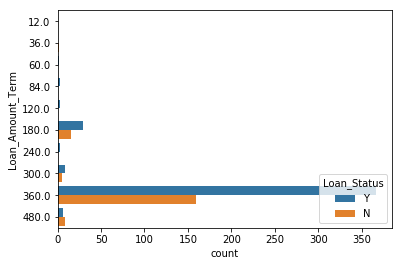

In [61]:
sns.countplot(y = 'Loan_Amount_Term', hue = 'Loan_Status', data = df_train)

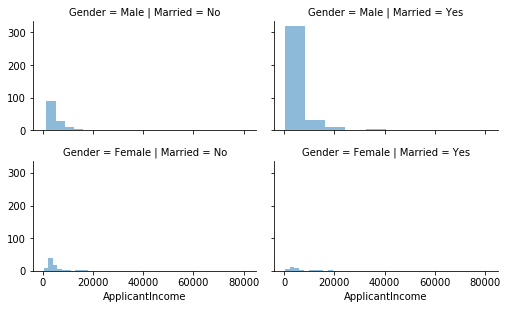

In [62]:
grid = sns.FacetGrid(df_train, row='Gender', col='Married', height=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

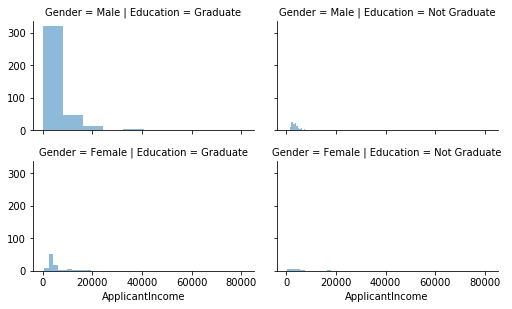

In [63]:
grid = sns.FacetGrid(df_train, row='Gender', col='Education', height=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

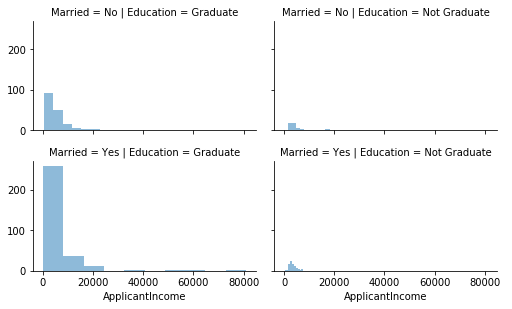

In [64]:
grid = sns.FacetGrid(df_train, row='Married', col='Education', height=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

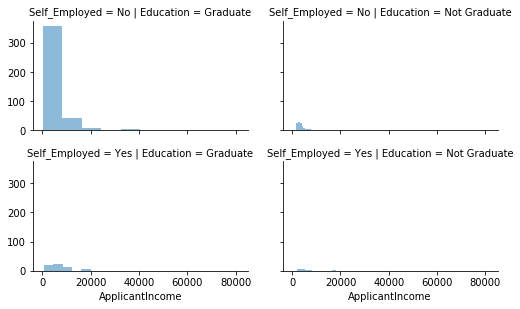

In [65]:
grid = sns.FacetGrid(df_train, row='Self_Employed', col='Education', height=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

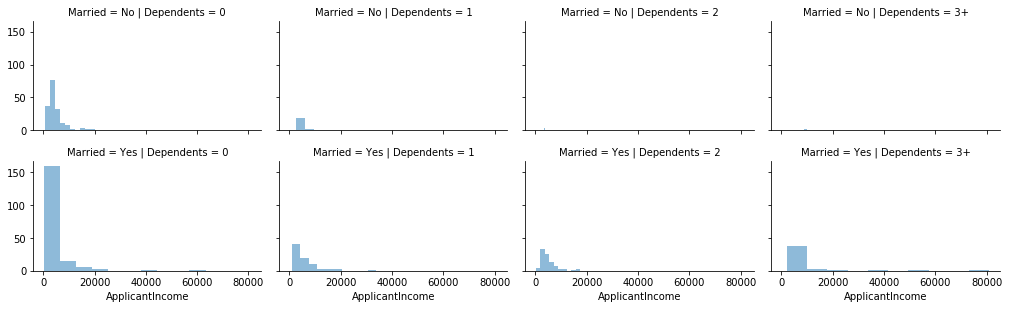

In [66]:
grid = sns.FacetGrid(df_train, row='Married', col='Dependents', height=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

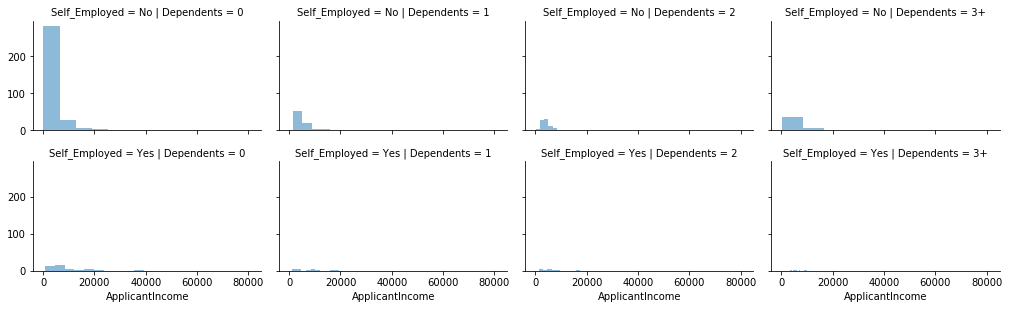

In [67]:
grid = sns.FacetGrid(df_train, row='Self_Employed', col='Dependents', height=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

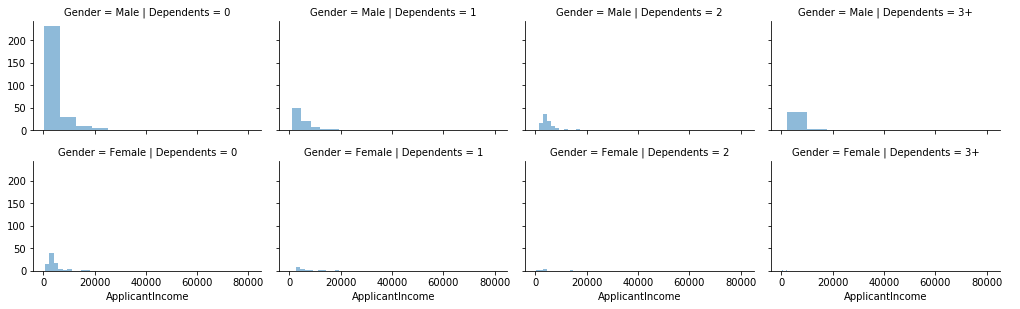

In [68]:
grid = sns.FacetGrid(df_train, row='Gender', col='Dependents', height=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

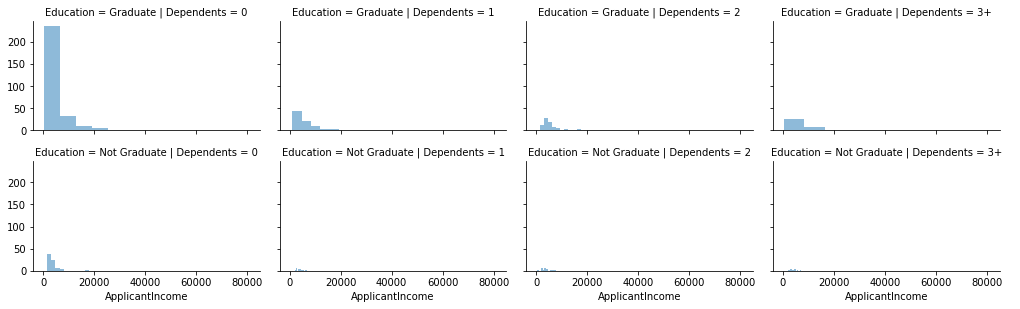

In [69]:
grid = sns.FacetGrid(df_train, row='Education', col='Dependents', height=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

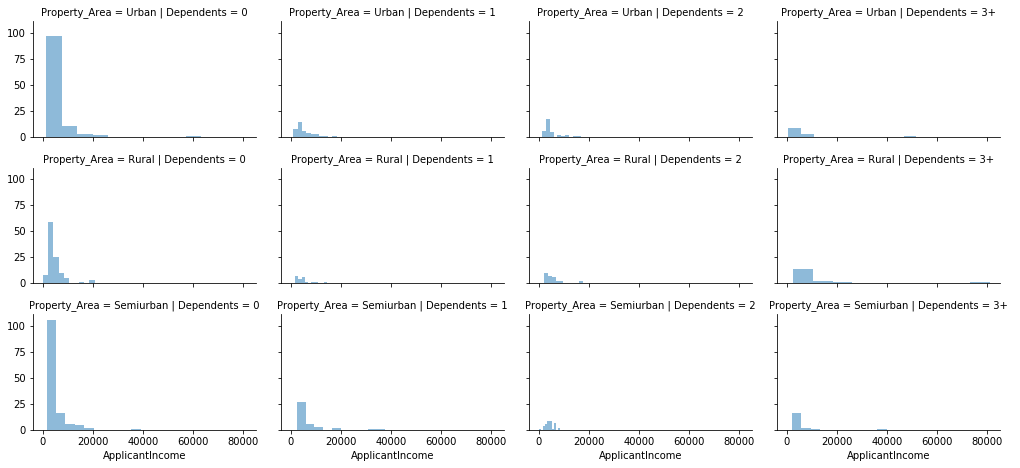

In [70]:
grid = sns.FacetGrid(df_train, row='Property_Area', col='Dependents', height=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

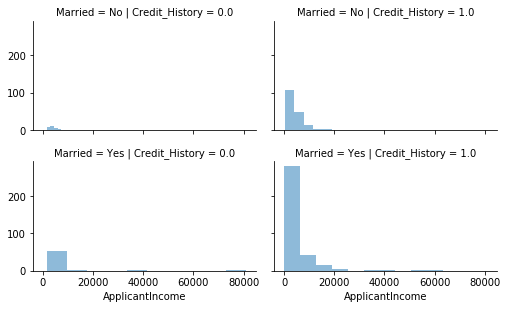

In [71]:
grid = sns.FacetGrid(df_train, row='Married', col='Credit_History', height=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

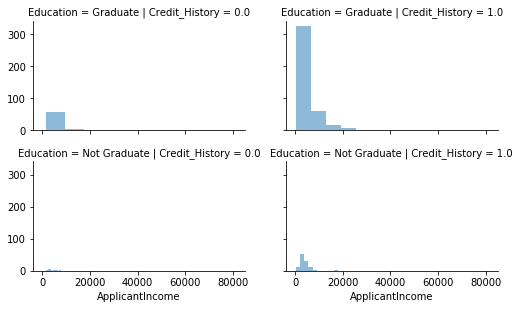

In [72]:
grid = sns.FacetGrid(df_train, row='Education', col='Credit_History', height=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

# ENCODING TO NUMERIC DATA; GETTING READY FOR TRAINING

In [73]:
code_numeric = {'Male': 1, 'Female': 2,'Yes': 1, 'No': 2,'Graduate': 1, 'Not Graduate': 2,'Urban': 3, 'Semiurban': 2,'Rural': 1,'Y': 1, 'N': 0,'3+': 3}
df_train = df_train.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
df_test = df_test.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)

df_train.drop('Loan_ID', axis = 1, inplace = True)

In [74]:
df_train['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [75]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null object
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
dtypes: float64(4), int64(7), object(1)
memory usage: 57.6+ KB


In [76]:
Dependents_ = pd.to_numeric(df_train.Dependents)
Dependents__ = pd.to_numeric(df_test.Dependents)
df_train.drop(['Dependents'], axis = 1, inplace = True)
df_test.drop(['Dependents'], axis = 1, inplace = True)
df_train = pd.concat([df_train, Dependents_], axis = 1)
df_test = pd.concat([df_test, Dependents__], axis = 1)

In [77]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null int64
Married              614 non-null int64
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
Dependents           614 non-null int64
dtypes: float64(4), int64(8)
memory usage: 57.6 KB


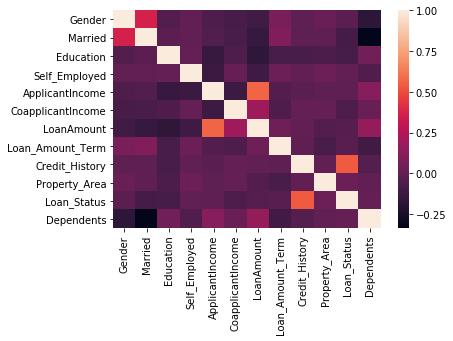

In [78]:
sns.heatmap(df_train.corr())

# SEPARATING TARGET FROM THE FEATURE FOR TRAINING

In [79]:
y = df_train['Loan_Status']
X = df_train.drop('Loan_Status', axis = 1)
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# USING LOGISTIC REGRESSION

In [80]:
model = LogisticRegression()
model.fit(X_train, y_train)
ypred = model.predict(X_test)
evaluation = f1_score(y_test, ypred)
evaluation

0.8979591836734695

In [81]:
model = LogisticRegression()

In [82]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [83]:
ypred = model.predict(X_test)
print(ypred)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]


In [84]:
evaluation = f1_score(y_test, ypred)
evaluation

0.8979591836734695

# USING DECISION TREE

In [85]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [86]:
ypred_tree = tree.predict(X_test)
print(ypred_tree)

[0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1
 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0
 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0
 1 1 1 0 0 0 1 1 0 1 0 0]


In [87]:
evaluation_tree = f1_score(y_test, ypred_tree)
evaluation_tree

0.7590361445783133

# USING RANDOM FOREST CLASSIFIER

In [88]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [89]:
ypred_forest = forest.predict(X_test)
print(ypred_forest)

[1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1
 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 0 1 1 1 1 1 0 1]


In [90]:
evaluation_forest = f1_score(y_test, ypred_forest)
evaluation_forest

0.8478260869565217

# CONCLUSION

**From the Exploratory Data Analysis, we could generate insight from the data. How each of the features relates to the target. Also, it can be seen from the evaluation of three models that Logistic Regression performed better than others, and Random Forest did better than Decision Tree.**